In [1]:
cd ..

/Users/simonwolf/git/aaa21


In [2]:
import cleaning
import utils
import seaborn as sns
import numpy as np
from scipy.stats import zscore

In [3]:
cleaning.clean_dataset(verbose=True)

Read the data set
Start cleaning the data set
5037633 invalid spatial entries have been successfully removed!
--> 632442 invalid entries found in Trip Seconds
--> 3967441 invalid entries found in Trip Miles
--> 72 invalid entries found in Fare
--> 0 invalid entries found in Tips
--> 4538325 invalid entries found in Tolls
--> 0 invalid entries found in Extras
--> 0 invalid entries found in Trip Total
9138280 invalid entries have been successfully dropped!
--> 877550 outlier detected and removed from Trip Seconds column using zscore
--> 21078 outlier detected and removed from Trip Miles column using zscore
--> 1262 outlier detected and removed from Fare column using zscore
--> 1111790 outlier detected and removed from Tips column using zscore
--> 741 outlier detected and removed from Tolls column using zscore
--> 1261 outlier detected and removed from Extras column using zscore
--> 996391 outlier detected and removed from Trip Total column using zscore
Outlier detection completed. Number

In [4]:
before = utils.read_parquet("Taxi_Trips.parquet", columns=[
            "Trip Seconds",
            "Trip Miles",
            "Fare",
            "Tips",
            "Tolls",
            "Extras",
            "Trip Total",
            "Pickup Centroid Location",
            "Dropoff Centroid  Location"
        ])
before

,Trip Seconds,Trip Miles,Fare,Tips,Tolls,Extras,Trip Total,Pickup Centroid Location,Dropoff Centroid Location
0,180.0,0.90,5.25,2.00,0.0,1.0,8.25,,
1,1200.0,11.00,25.25,0.00,0.0,0.0,25.25,,
2,360.0,0.69,5.05,0.00,0.0,1.0,6.05,,
3,180.0,0.50,4.45,0.00,0.0,4.0,8.45,,
4,2940.0,23.10,48.05,0.00,0.0,1.0,49.05,,
...,...,...,...,...,...,...,...,...,...
32385870,3060.0,15.20,34.25,7.45,0.0,3.0,44.70,POINT (-87.640698076 41.9431550855),POINT (-87.9030396611 41.9790708201)
32385871,300.0,1.00,5.45,0.00,0.0,1.0,6.45,POINT (-87.6209929134 41.8849871918),POINT (-87.6714455473 41.9797955506)
32385872,300.0,0.60,5.05,0.00,0.0,0.0,5.05,POINT (-87.6262105324 41.8991556134),POINT (-87.6318639497 41.8920421365)
32385873,360.0,0.53,6.05,0.00,0.0,0.0,6.05,POINT (-87.6838349425 41.9477915865),POINT (-87.6838349425 41.9477915865)


In [5]:
after = utils.read_parquet("Taxi_Trips_cleaned.parquet")
after

,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,Tips,Tolls,Extras,Trip Total,Pickup Centroid Location,Dropoff Centroid Location
0,240.0,1.20,nan,nan,1.0,1.0,5.65,0.0,0.0,0.0,5.65,POINT (-87.67016685690001 42.0096228806),POINT (-87.67016685690001 42.0096228806)
1,240.0,0.70,nan,nan,31.0,28.0,5.25,0.0,0.0,1.0,6.25,POINT (-87.667569312 41.8502663663),POINT (-87.6635175498 41.874005383)
2,900.0,3.50,nan,nan,28.0,8.0,11.25,0.0,0.0,1.0,12.25,POINT (-87.6635175498 41.874005383),POINT (-87.6333080367 41.899602111)
3,480.0,2.20,nan,nan,31.0,5.0,8.05,0.0,0.0,2.0,10.05,POINT (-87.667569312 41.8502663663),POINT (-87.6838349425 41.9477915865)
4,300.0,0.90,17031081700.0,17031081000.0,8.0,8.0,5.45,0.0,0.0,0.0,5.45,POINT (-87.6318639497 41.8920421365),POINT (-87.6321092196 41.9002656868)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15199884,300.0,1.10,17031839100.0,17031281900.0,32.0,28.0,5.65,0.0,0.0,1.0,6.65,POINT (-87.6327464887 41.8809944707),POINT (-87.642648998 41.8792550844)
15199885,300.0,1.00,17031320100.0,17031030900.0,32.0,77.0,5.45,0.0,0.0,1.0,6.45,POINT (-87.6209929134 41.8849871918),POINT (-87.6714455473 41.9797955506)
15199886,300.0,0.60,17031081201.0,17031081700.0,8.0,8.0,5.05,0.0,0.0,0.0,5.05,POINT (-87.6262105324 41.8991556134),POINT (-87.6318639497 41.8920421365)
15199887,360.0,0.53,nan,nan,5.0,5.0,6.05,0.0,0.0,0.0,6.05,POINT (-87.6838349425 41.9477915865),POINT (-87.6838349425 41.9477915865)


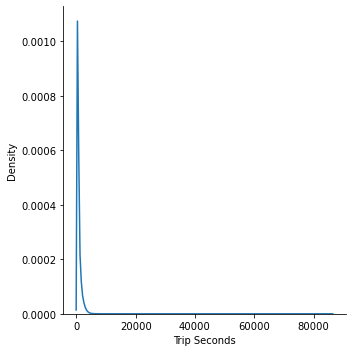

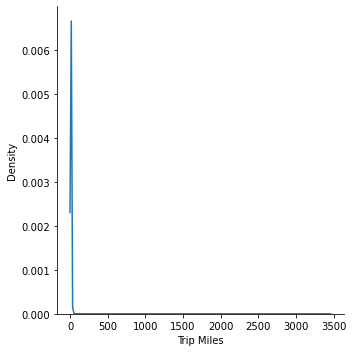

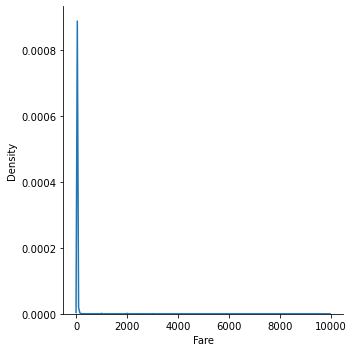

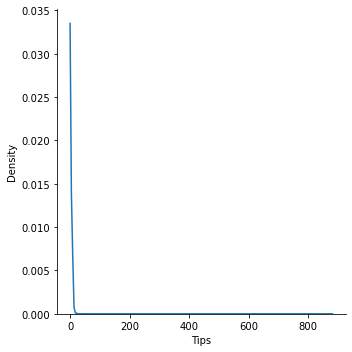

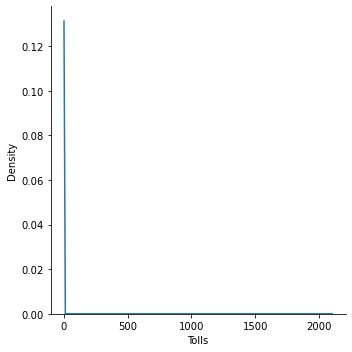

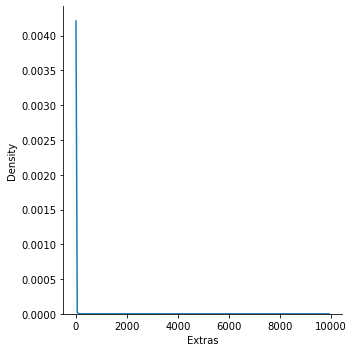

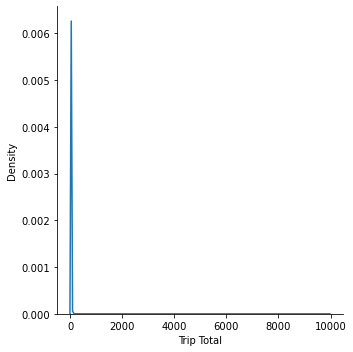

In [6]:
for col in [
            "Trip Seconds",
            "Trip Miles",
            "Fare",
            "Tips",
            "Tolls",
            "Extras",
            "Trip Total"
        ]:
    sns.displot(before, x=col, kind="kde")

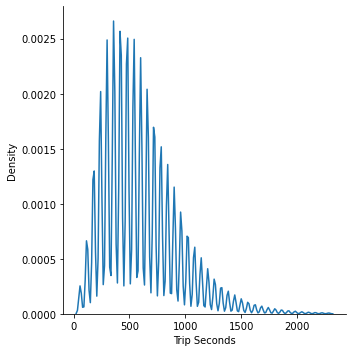

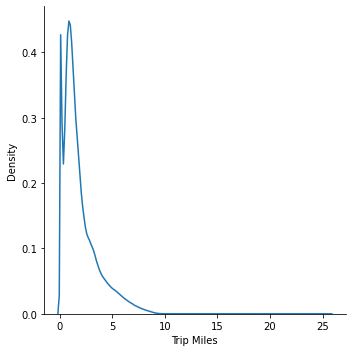

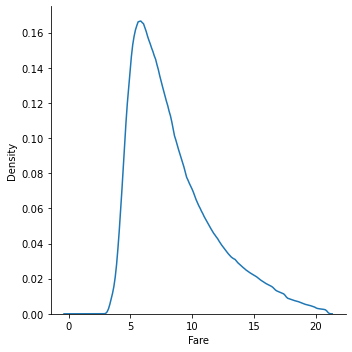

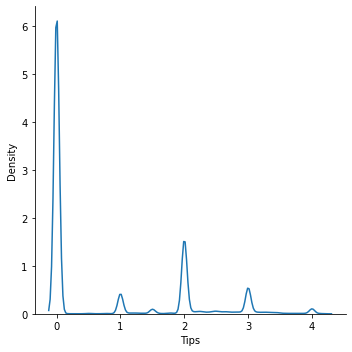

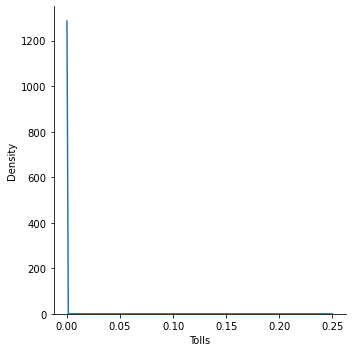

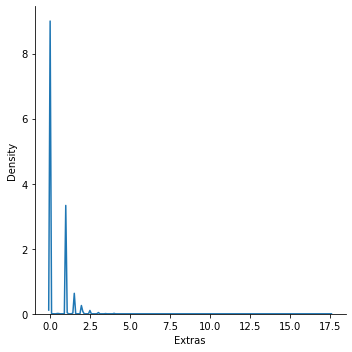

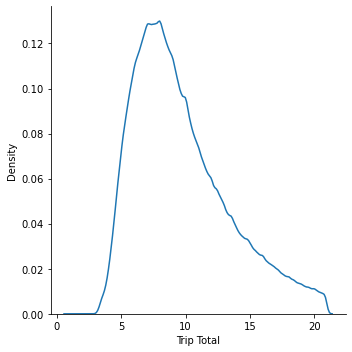

In [7]:
for col in [
            "Trip Seconds",
            "Trip Miles",
            "Fare",
            "Tips",
            "Tolls",
            "Extras",
            "Trip Total"
        ]:
    sns.displot(after, x=col, kind="kde")

In [13]:
after.eq('nan').sum()

Trip Seconds                        0
Trip Miles                          0
Pickup Census Tract           3434226
Dropoff Census Tract          3434226
Pickup Community Area             903
Dropoff Community Area          35044
Fare                                0
Tips                                0
Tolls                               0
Extras                              0
Trip Total                          0
Pickup Centroid Location            0
Dropoff Centroid  Location          0
dtype: int64

In [14]:
after.eq('').sum()

Trip Seconds                     0
Trip Miles                       0
Pickup Census Tract              0
Dropoff Census Tract             0
Pickup Community Area            0
Dropoff Community Area           0
Fare                             0
Tips                             0
Tolls                            0
Extras                           0
Trip Total                       0
Pickup Centroid Location       624
Dropoff Centroid  Location    2360
dtype: int64